In [1]:
#import sys
#!{sys.executable} -m pip install sklearn

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import math

import Intensity
from Embryo import *
from TestingArea import *
from Polygon import *
from Rotation import *
from Boundary import *

Test Embryo Class

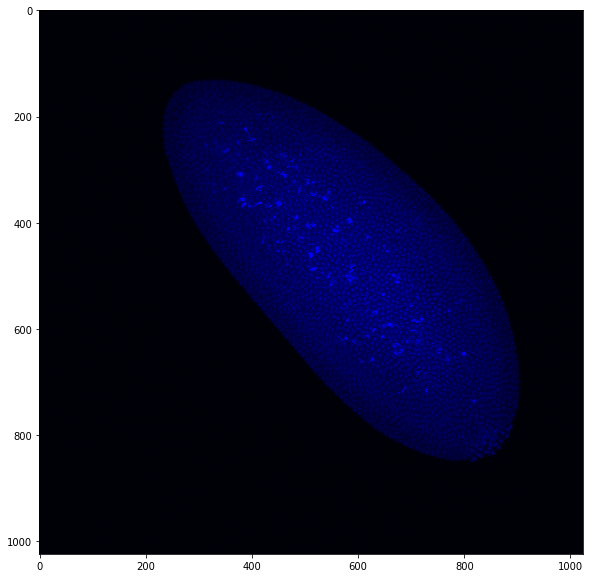

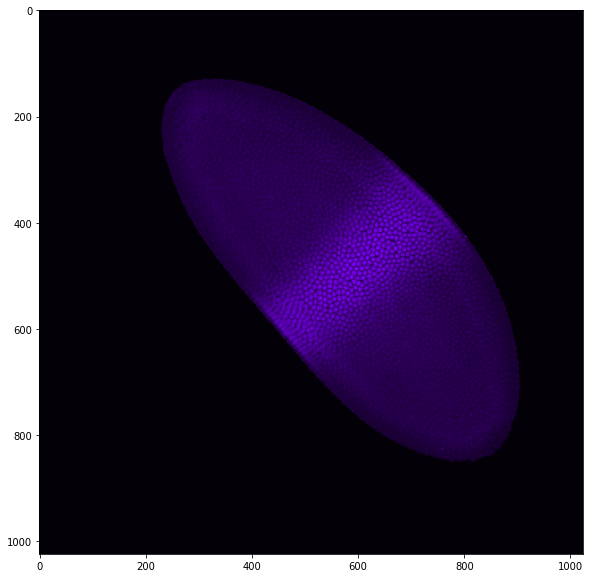

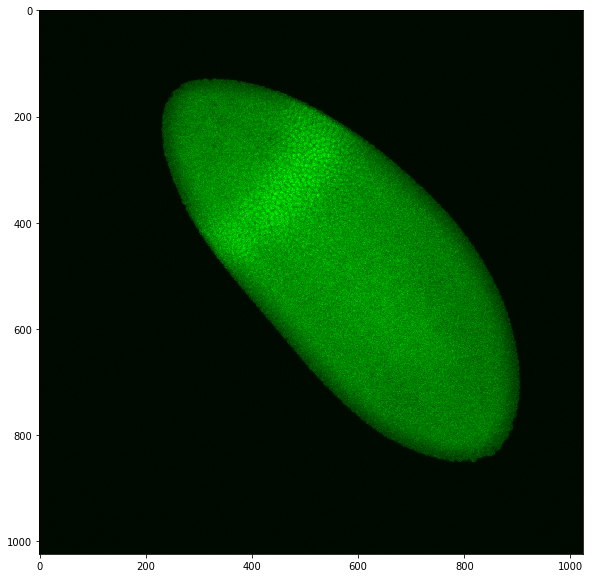

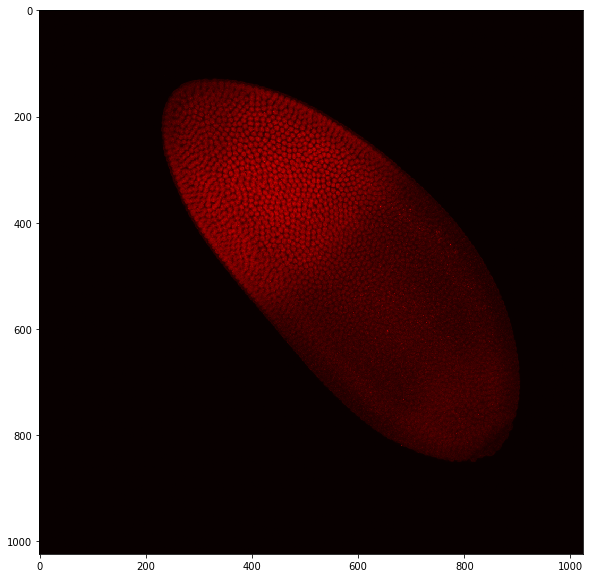

In [3]:
embryo_list =[]

gene_names = np.array( ['C1-WT','C2-WT','C3-WT','C4-WT'] )
gene_position = 7

for name in gene_names:
    filename ="%s-%i.png"%(name, gene_position)
    egg = Embryo(filename)
    egg.gene_name = name
    egg.gene_position = gene_position
    embryo_list.append( egg )

for egg in embryo_list:
    egg.view()
    egg.rgb2gray()


C1-WT
7


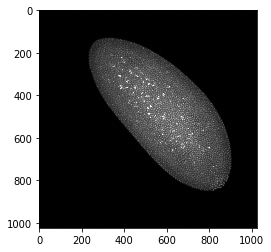

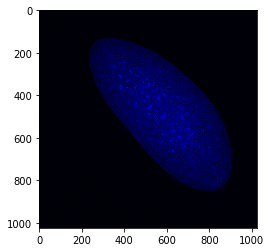

In [4]:
# test gray_image and backup_imgae
# test attribute
egg1 = embryo_list[0]

print(egg1.gene_name)
print(egg1.gene_position)

plt.imshow(egg1.gray_image, 'gray')
plt.show()

plt.imshow(egg1.bk_image)
plt.show()


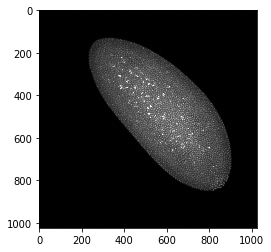

"\nTodo:  test existence of a filename: \n    \negg = Embryo('aaa')\n\n"

In [5]:
# test read from array
egg = Embryo(egg1.raw_image)

plt.imshow(egg.raw_image, 'gray')
plt.show()

"""
Todo:  test existence of a filename: 
    
egg = Embryo('aaa')

"""




Test Boundary Class



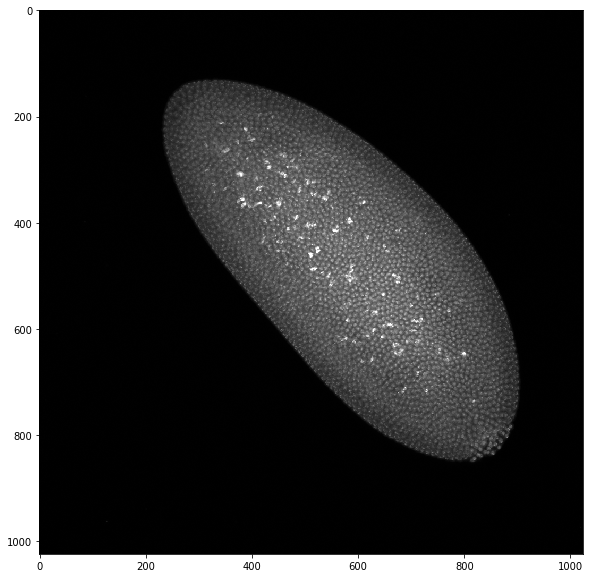

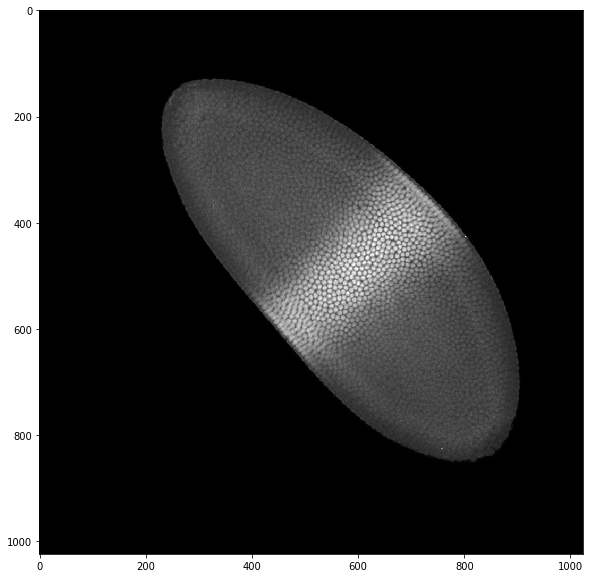

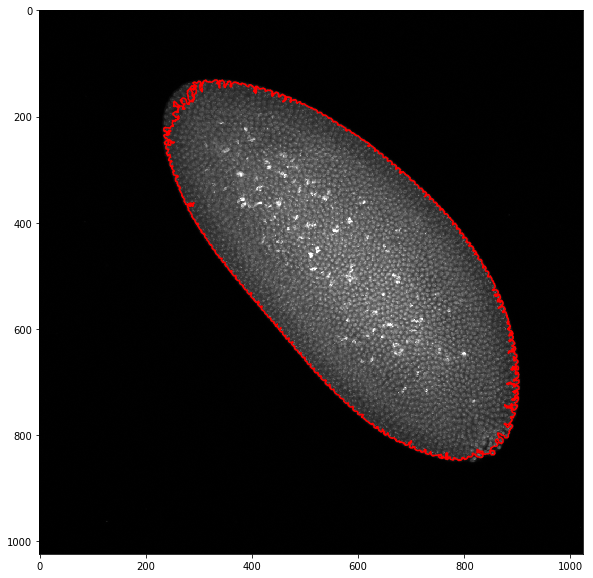

In [6]:
# initialization from an Embryo object
bd = Boundary(egg1)
bd.view()

# initialization from an array
egg2 = embryo_list[1]
bd.set_ref_image(egg2)
bd.view()

#detect boundary
bd = Boundary(egg1.raw_image)
bd.detect_boundary()
bd.view_boundary_curve()

head: [298.55187197 519.11485936]
tail: [1157.94809988  809.16703595]
center: [746. 636.]
orientation 2.886076451097823


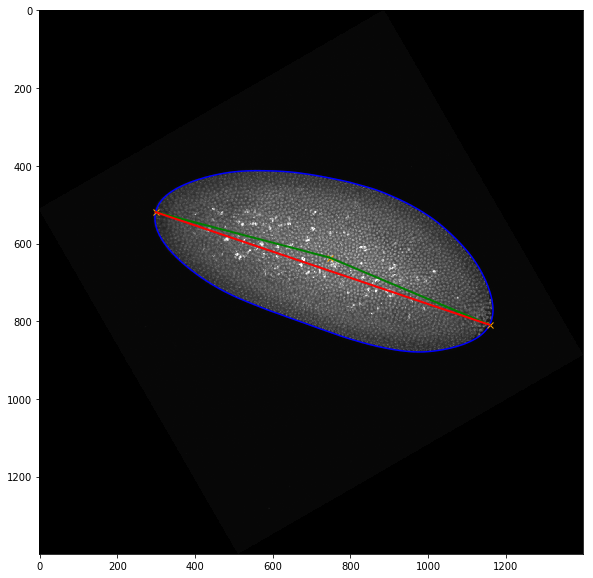

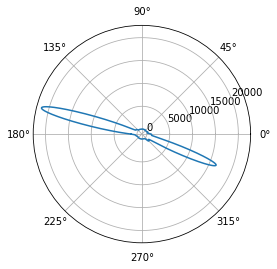

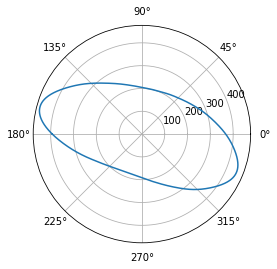

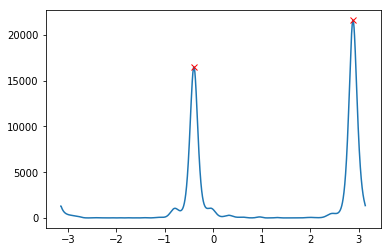

In [19]:
#detect head and tail
mode ='curvature'
#mode = 'pca'
bd.detect_head_tail(mode)

print('head:', bd.get_head(mode))
print('tail:', bd.get_tail(mode))
print('center:', bd.get_center(mode))
print('orientation', bd.get_orientation(mode))

bd.view_head_tail_curvature()
 
curvature, angles, distances = bd.get_curvature_info()
peaks = bd.get_peaks()

plt.polar(angles, curvature)
plt.show()

plt.polar(angles, distances)
plt.show()

plt.plot(angles, curvature)
plt.plot(angles[peaks], curvature[peaks], 'x', color='r')
plt.show()
    



In [ ]:
print('orientation:', orientation)
head_angle = angles[head_idx]
head_distance = distances[head_idx]
tail_angle = angles[tail_idx]
tail_distance = distances[tail_idx]

head = bd.transform_polar_to_cartesian(head_angle, head_distance, bd.get_center(mode))
tail = bd.transform_polar_to_cartesian(tail_angle, tail_distance, bd.get_center(mode))

orientation = bd.compute_angle(head, bd.get_center(mode))

print('head:',head)
print('tail:',tail)


head: [288.0, 154.0]
tail: [873.0, 800.0]
center: [584.26973855 481.22250215]
orientation 2.306542299067935


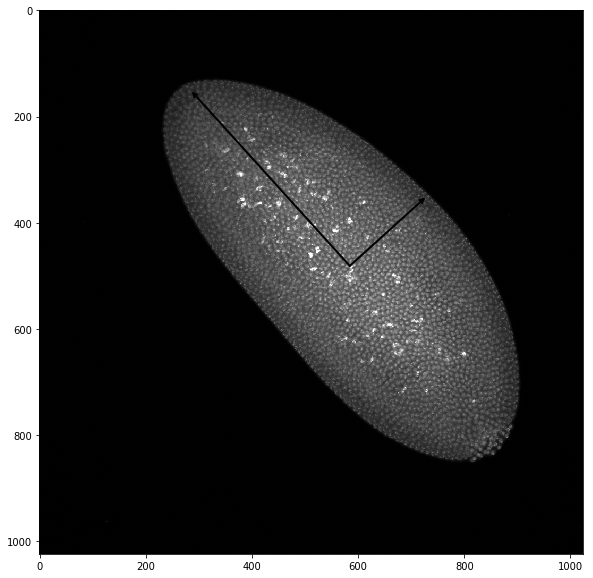

In [10]:
# test method Pricipal Component Analysis

mode = 'pca'
bd.detect_head_tail(mode)

print('head:', bd.get_head(mode))
print('tail:', bd.get_tail(mode))
print('center:', bd.get_center(mode))
print('orientation', bd.get_orientation(mode))

bd.view_head_tail_pca()



Test Roataion Class

rotation angle: -2.8311977494193425


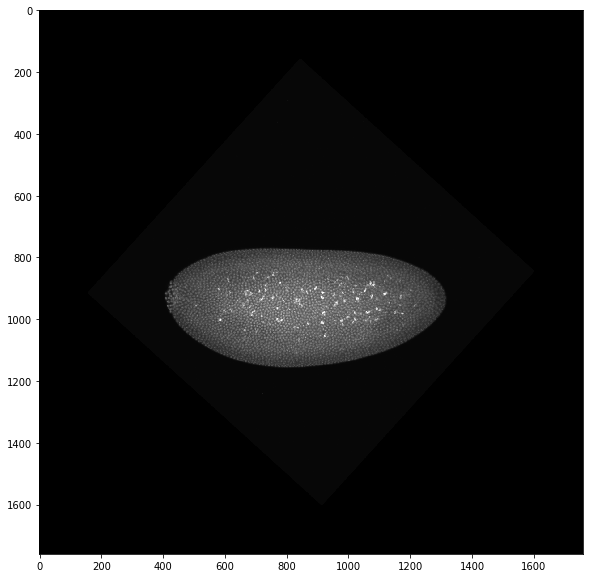

rotation angle: -0.052359877559829675


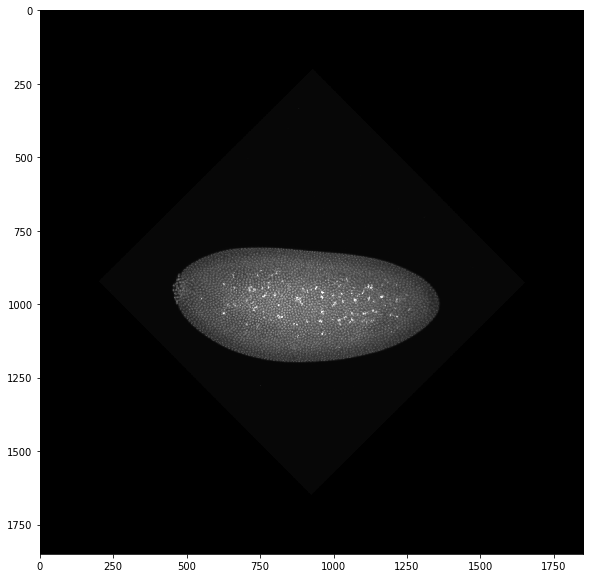

rotation angle: 0.052084007430942374


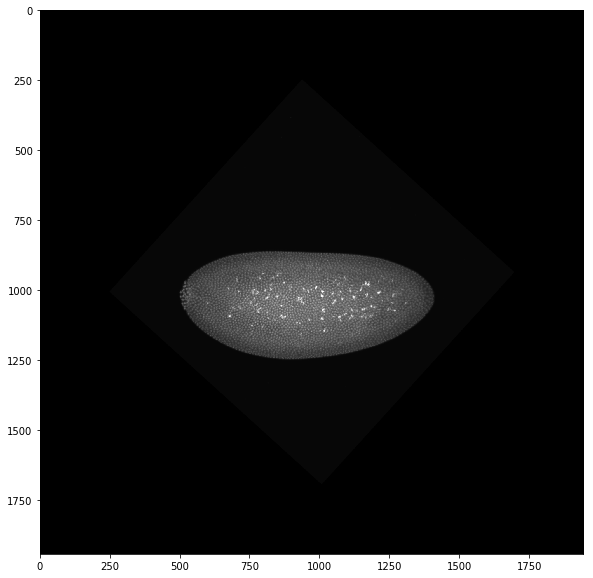

In [16]:
# rotate back

#mode = 'curvature'
mode = 'pca'
bd = Boundary(rotated_egg)
bd.detect_head_tail(mode)
print('rotation angle:', -bd.get_orientation(mode))

#with the presence of the boundary
rotated_egg2 = r.rotate_embryo(rotated_embryo, boundary=bd)
rotated_egg2.view()

# without boundary, using pca method to generate a boundary on the fly
rotated_egg3 = r.rotate_embryo(rotated_egg2, bd_mode = 'curvature')
print('rotation angle:', r.angle)
rotated_egg3.view()

#without boundary, use pca method on the fly
rotated_egg4 = r.rotate_embryo(rotated_egg3, bd_mode = 'pca')
print('rotation angle:', r.angle)
rotated_egg4.view()


Test Polygon Class

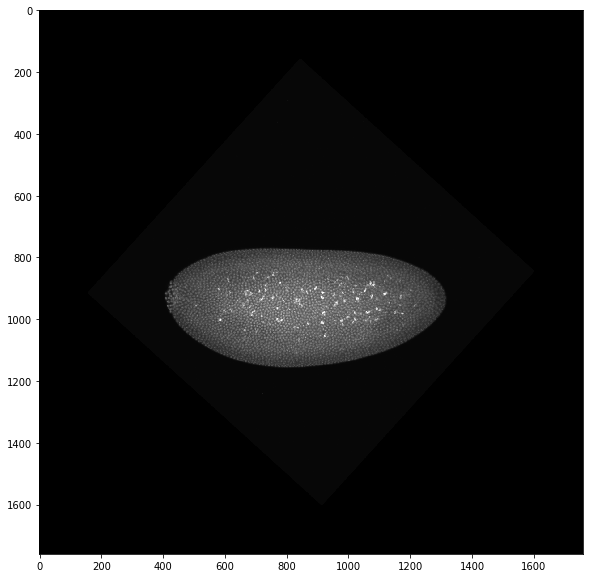

[1760 1760]


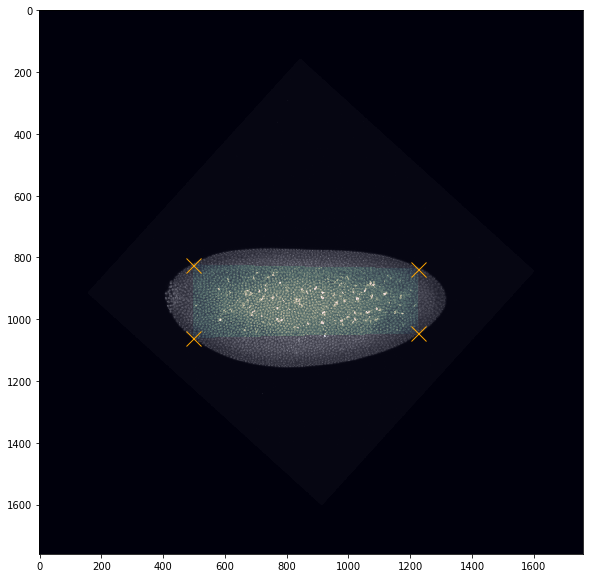

vertice: [ 823 , 498 ]
vertice: [ 1060 , 498 ]
vertice: [ 1045 , 1225 ]
vertice: [ 836 , 1225 ]


In [17]:
testing_img = Polygon(rotated_egg2)
testing_img.view()

print(testing_img.ref_image_dim)

# detect area from the image, using Fourier transformation and convex_hull curve
testing_img.detect_area()
testing_img.view_area()

for (x,y) in testing_img.vertices:
    print('vertice: [', x,',', y,']')


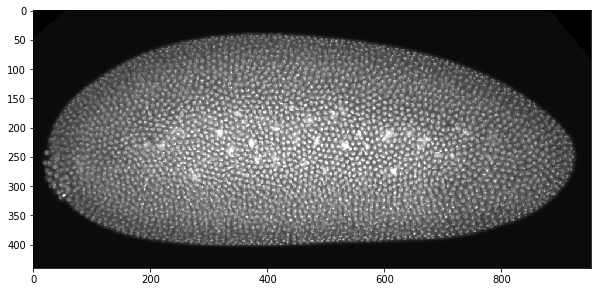

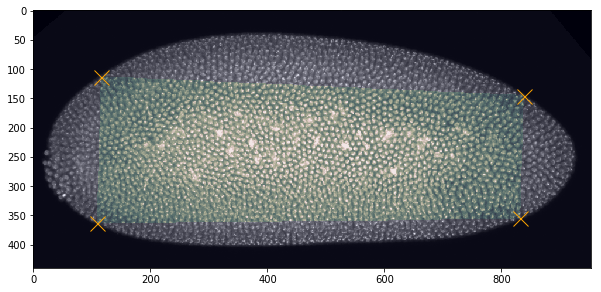

vertice: [ 113 , 116 ]
vertice: [ 363 , 109 ]
vertice: [ 355 , 832 ]
vertice: [ 145 , 838 ]


In [13]:
#detect area with the help of a boundary curve

testing_img = Polygon(egg1)
testing_img.view()

mode = 'curvature'
#mode = 'pca'
bd = Boundary(egg1)
bd.detect_head_tail(mode)

testing_img.detect_area(boundary = bd)
testing_img.view_area()

for (x,y) in testing_img.vertices:
    print('vertice: [', x,',', y,']')


Test Intensity Module

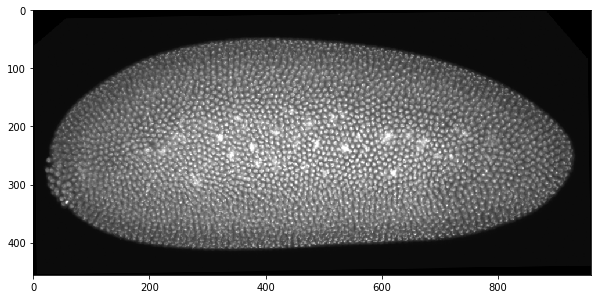

(906, 2)


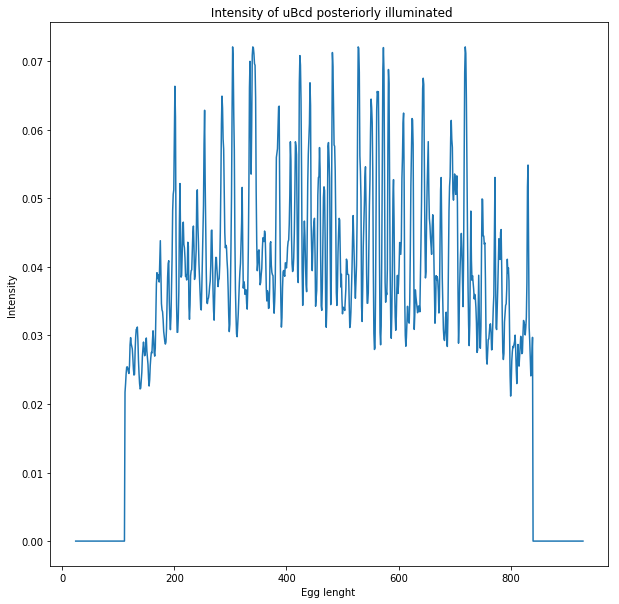

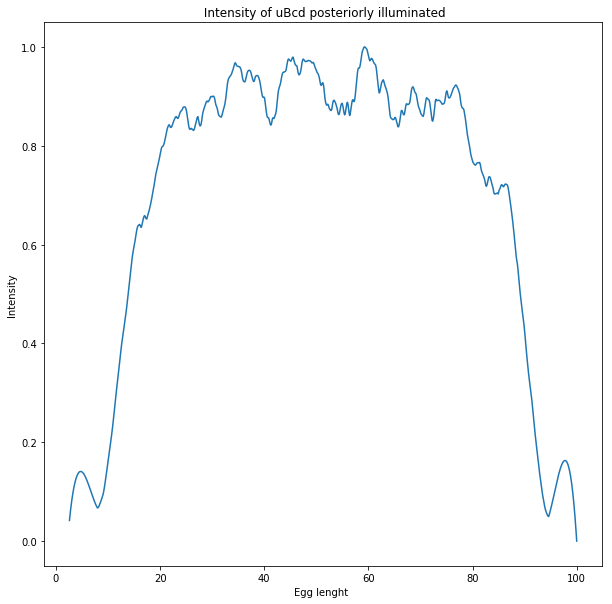

In [14]:
# rotate the embryo first to horizonal position
r = Rotation(egg1)
rotated_egg = r.rotate_embryo(egg1, bd_mode = 'pca')
rotated_egg.view()

# compute the intensity curve
intensity_curve = Intensity.detect_intensity(rotated_egg)
print(intensity_curve.shape)

# without normalization
Intensity.view([intensity_curve])

# after normalization
normalized_curves = Intensity.normalization([intensity_curve])
Intensity.view(normalized_curves)


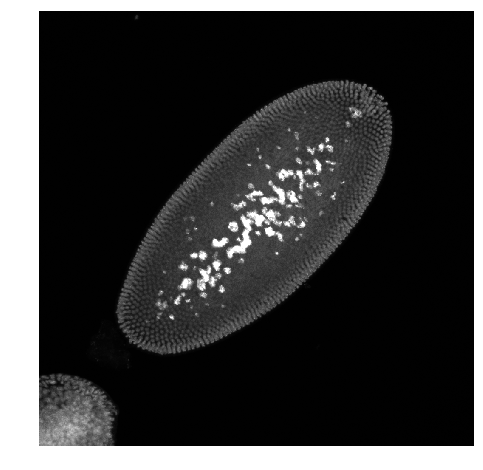

In [5]:
from skimage import io, exposure, morphology, segmentation, viewer, measure, color

filename = "C1-ubcd dark-8.png"
a = skimage.io.imread(filename,plugin='matplotlib')
a_gray = color.rgb2gray(a.copy())
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
ax.imshow(a_gray,"gray")
plt.show()

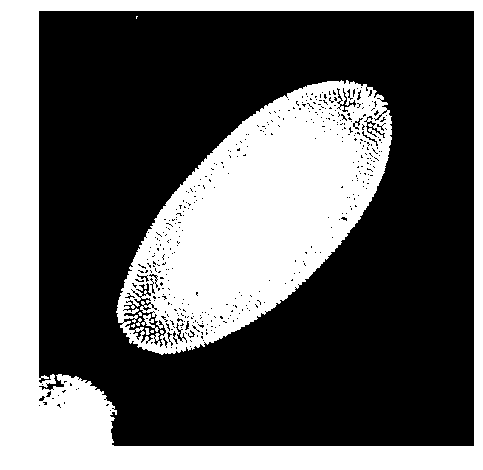

In [14]:
threshold = skimage.filters.threshold_otsu(a_gray)
bw = a_gray > threshold
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
ax.imshow(bw,"gray")
plt.show()
contours = skimage.measure.find_contours(bw, level= threshold)


In [23]:
l = len(contours)


array([942.        , 941.01307254, 941.01307254, 941.        ,
       940.        , 939.98692746, 939.98692746, 939.98692746,
       940.        , 940.98692746, 941.        , 941.01307254,
       942.        , 942.01307254, 942.        ])

IndexError: list index out of range

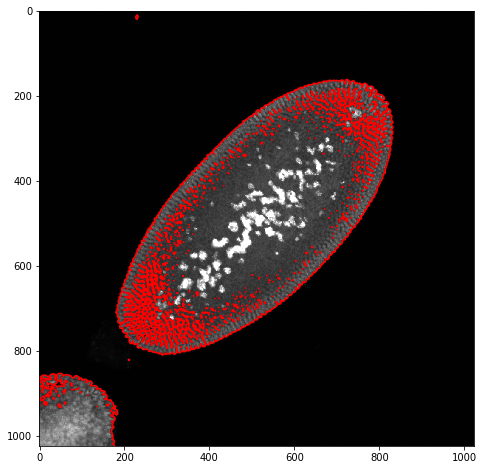

In [43]:
fig,ax =plt.subplots(figsize = (8,8))            
ax.imshow(a_gray,'gray')
for i in range(l+1):
    contour = contours[i]
    ax.plot(contour[:,1], contour[:,0], color = 'r')
plt.show()


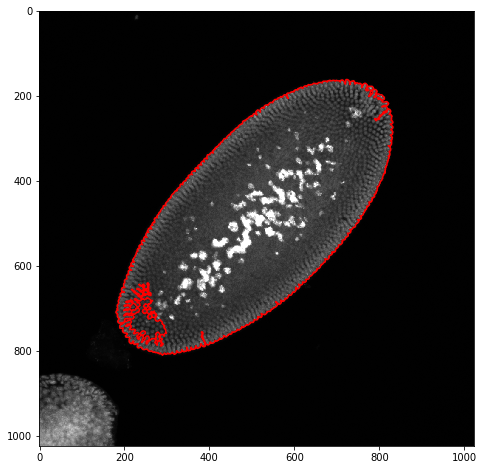

In [44]:
fig,ax =plt.subplots(figsize = (8,8))            
ax.imshow(a_gray,'gray')

contour = contours[1]
ax.plot(contour[:,1], contour[:,0], color = 'r')
plt.show()

In [ ]:
 def detect_convex_hull(self, threshold=None):
        if threshold is None:
            threshold = skimage.filters.threshold_otsu(self.ref_image)
        
        self.convex_hull = skimage.morphology.convex_hull_image(self.ref_image > threshold)
        contours = skimage.measure.find_contours(self.convex_hull, level = threshold)
        self.convex_contour = contours[0]    
   

In [83]:
shape = bw.shape
c_image = np.zeros(shape)

In [77]:
c_image = np.zeros((1024,1024))
for i in range(len(contour)):
    x = np.round(contour[i][0]).astype(int)
    y = np.round(contour[i][1]).astype(int)
    c_image[x,y]=1

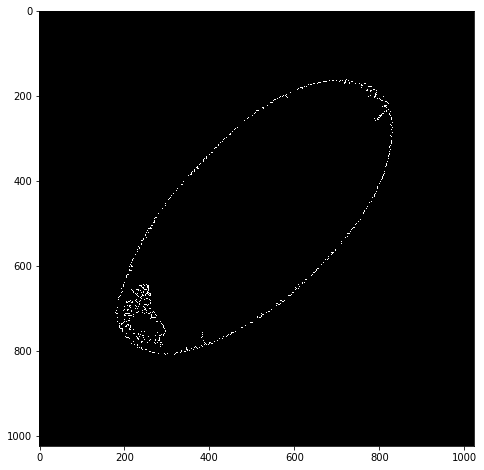

In [80]:
fig,ax =plt.subplots(figsize = (8,8))            
ax.imshow(c_image,'gray')

In [81]:
convex_hull = skimage.morphology.convex_hull_image(c_image)
convex_contours = skimage.measure.find_contours(convex_hull, level = 0.5)

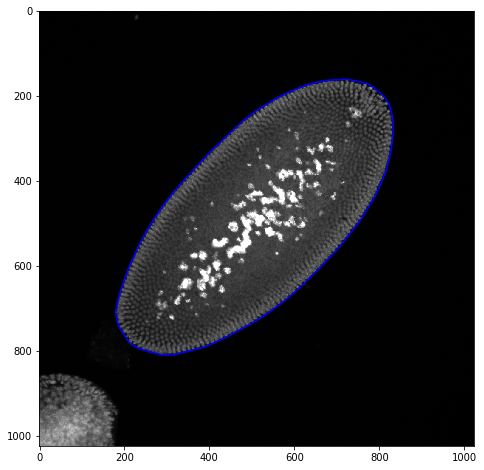

In [82]:
fig,ax =plt.subplots(figsize = (8,8))            
ax.imshow(a_gray,'gray')

convex_contour = convex_contours[0]
ax.plot(convex_contour[:,1], convex_contour[:,0], color = 'blue')
plt.show()